# Experiment 1.1 Human Intervention



---

## 1. Dataset Creation

> Prof Dino has major GI issues (I do), stemming from a gluten and a lactose allergy. Let's just say that if he eats something with gluten or drinks something with lactose, then next day(s) he has diarrhea. Create a dataset with breakfast, morning tea, lunch, afternoon tea, dinner, toilet. Each column is binary (T/F) values, and for breakfast, lunch, and dinner denotes whether or not I had gluten. For both tea columns, it's whether I had tea with milk. Toilet T means diarrhea. Create that dataset randomly as T/F values, for all columns. Make sure the label is balanced around T/F.

## 1.1 Generate Randomly Selected Data

To achieve this, I will outline the steps to create a balanced dataset with $43,800$ rows, equivalent to approximately $120$ years of data (All I wish Prof. Dino will live forever, but my RAM is small.):

1. Create a dataframe called df_daily with five columns: `Breakfast`, `Morning_Tea`, `Lunch`, `Afternoon_Tea`, and `Dinner`.

2. Add $43,800$ rows to df_daily where all values are randomly filled with $True$ or $False$.

By following these steps, we can generate a balanced dataset around $True$ and $False$ values.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Concatenate
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Number of days for this dataset
num_rows = 43800  # Change this as needed
n_days = 43800

In [2]:
# Create a balanced binary dataset
df_daily = pd.DataFrame({
    'Breakfast': np.random.choice([True, False], num_rows),
    'Morning_Tea': np.random.choice([True, False], num_rows),
    'Lunch': np.random.choice([True, False], num_rows),
    'Afternoon_Tea': np.random.choice([True, False], num_rows),
    'Dinner': np.random.choice([True, False], num_rows),
    'Toilet': np.random.choice([True, False], num_rows),
})


## 1.2 Check Dataframe Shape

In [3]:
df_daily.shape

(43800, 6)

By following this approach, we have successfully obtained a dataset with $43,800$ rows and $6$ labels. To ensure the data's integrity, let's perform a sanity check to confirm that there are no $NaN$ values present.

---

## 1.3 Sanity Check

Here's the code snippet to perform the sanity check:

In [4]:
# Check for NaN values in the dataset
nan_values = df_daily.isnull().sum().sum()

if nan_values == 0:
    print("Sanity check passed: No NaN values detected in the dataset.")
else:
    print("Sanity check failed: NaN values detected in the dataset.")

Sanity check passed: No NaN values detected in the dataset.


Then, let's examine all the column names in the dataframe df_daily to get an overview of the available columns.

In [5]:
column_names = df_daily.columns.tolist()

print("Column names in the dataframe df_daily:")
print(column_names)

Column names in the dataframe df_daily:
['Breakfast', 'Morning_Tea', 'Lunch', 'Afternoon_Tea', 'Dinner', 'Toilet']


Next, let's examine the distribution of values in the `Toilet` column of the dataframe to assess the dataset's balance. This will provide insights into the proportion of `True` and `False` values in the dataset.

In [6]:
# Check the distribution of values in the 'Toilet' column
toilet_distribution = df_daily['Toilet'].value_counts()

print("Distribution of values in the 'Toilet' column:")
print(toilet_distribution)

Distribution of values in the 'Toilet' column:
False    21918
True     21882
Name: Toilet, dtype: int64


<AxesSubplot:xlabel='Toilet', ylabel='count'>

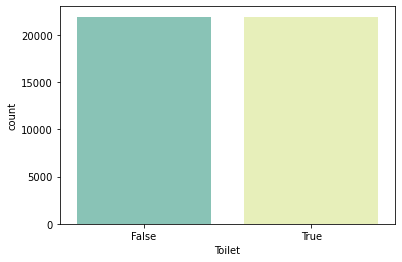

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Visualize the distribution of values in column 'Toilet'
sns.countplot(x = df_daily['Toilet'], palette=["#7fcdbb", "#edf8b1"])

In [8]:
for col in df_daily.columns:
    print(df_daily[col].value_counts())

False    22007
True     21793
Name: Breakfast, dtype: int64
False    21933
True     21867
Name: Morning_Tea, dtype: int64
True     22025
False    21775
Name: Lunch, dtype: int64
True     22061
False    21739
Name: Afternoon_Tea, dtype: int64
False    21947
True     21853
Name: Dinner, dtype: int64
False    21918
True     21882
Name: Toilet, dtype: int64


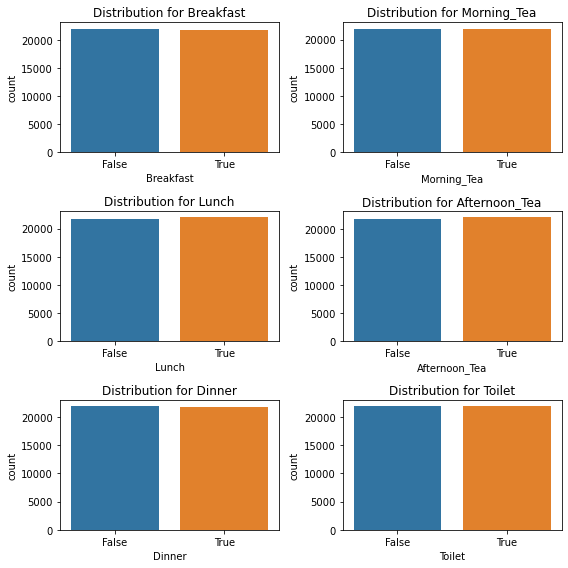

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(8, 8))

axes = axes.flatten()  # Using this can turn the 2D grid of axes into a flat array

for i, col in enumerate(df_daily.columns):
    sns.countplot(x=df_daily[col], ax=axes[i])
    axes[i].set_title(f"Distribution for {col}")

plt.tight_layout()
plt.show()


Based on the distribution of values in the `Toilet` column as shown above, we can infer that the dataset is balanced. This conclusion is drawn from observing that there is a roughly equal number of $True$ and $False$ values in the column. With this confirmation, we can proceed to the next step: model creation.

---

# 2. Human Learn Data

I believe that humans and neural networks learn from datasets and make predictions fundamentally in different ways due to the differences in our cognitive structures and underlying mechanics. This is how I think a human would learn from the dataset.

1. **Observation & Pattern Recognition:** Humans learn by observation and identifying patterns in data. For example, in the case of Prof. Dino's food consumption and subsequent toilet usage, a human could look through the data and start noticing patterns: "Whenever Prof. Dino consumes gluten for breakfast and lactose in the morning tea, he tends to have diarrhea the next day." This form of learning is intuitive and relies heavily on our ability to discern patterns and make connections. This is analogous, in some sense, to the initial stages of training a neural network where it learns to recognize patterns in the input data.


2. **Reasoning & Logic:** Humans can use reasoning and logical inference to learn from data. For instance, if Prof. Dino always has diarrhea after consuming gluten and lactose, we could reason that it's probably due to his allergies, and predict that he would likely have the same reaction in the future. This kind of inferential learning is more challenging/impractical for neural networks, which typically learn from patterns in data rather than by reasoning about cause-and-effect relationships.

3. **Prior Knowledge and Generalization:** Humans can apply prior knowledge to new situations. If we know from other sources that gluten and lactose can cause digestive issues for some people, we could apply that knowledge to Prof. Dino's situation. Neural networks, on the other hand, don't have prior knowledge in the way humans do and must learn everything from the data they're given. In our case, a human was told that Prof. Dino has the tendency to get digestive issues when consuming inappropriate food. But the computer certainly wouldn't know this.

Then, let's perform the 1st stage of human perceiving the knowledge from the dataset.

In [10]:
# df_daily = df_daily.astype(int)

In [11]:
# Split the dataframe into features (input) and labels (output)
features = df_daily[['Breakfast', 'Lunch', 'Dinner', 'Morning_Tea', 'Afternoon_Tea']][0:21900*2 - 1]
labels = df_daily['Toilet'][1:]

Perform an inspection to check the number of rows in the feature and label dataframes and verify if they have the same length. Doing this will display the number of rows in the features and labels dataframes. It will also indicate whether the two dataframes have the same length or not.

In [12]:
num_features_rows = len(features)
num_labels_rows = len(labels)

print("Number of rows in features dataframe:", num_features_rows)
print("Number of rows in labels dataframe:", num_labels_rows)

if num_features_rows == num_labels_rows:
    print("The feature and label dataframes have the same length.")
else:
    print("The feature and label dataframes do not have the same length.")


Number of rows in features dataframe: 43799
Number of rows in labels dataframe: 43799
The feature and label dataframes have the same length.


In [13]:
import itertools

features = features.reset_index(drop=True)
labels = labels.reset_index(drop=True)

unique_combinations = set(tuple(x) for x in features.values)

unique_combo = []
# Print unique combinations
for combination in unique_combinations:
    print(combination)
    unique_combo.append(combination)


(True, True, True, False, False)
(False, True, False, False, True)
(False, False, True, False, False)
(True, False, True, True, False)
(False, False, False, False, False)
(False, True, True, True, True)
(True, True, True, True, True)
(True, False, False, True, False)
(True, True, False, False, False)
(False, False, True, True, True)
(True, False, False, False, True)
(False, True, False, False, False)
(False, False, False, True, True)
(True, False, True, False, True)
(False, True, True, True, False)
(False, True, False, True, True)
(True, True, True, True, False)
(False, False, True, True, False)
(True, True, False, True, True)
(False, True, True, False, True)
(False, False, False, True, False)
(True, True, True, False, True)
(True, False, False, False, False)
(True, False, True, False, False)
(False, False, True, False, True)
(True, False, True, True, True)
(True, False, False, True, True)
(False, False, False, False, True)
(False, True, False, True, False)
(True, True, False, True, Fa

In [14]:
len(unique_combo)

32

Upon close observation and analysis of the data stored in the five feature columns, we notice a consistent pattern. Specifically, the value for each entry in these columns is either a 0 or a 1, mirroring the binary nature of our experimental parameters (consumption of gluten and/or lactose).

This observation underscores a fundamental aspect of our dataset and the broader experimental design. It corroborates our initial hypothesis, which postulated the existence of 32 possible combinations of dietary intake and physiological responses. This stems from the binary representation of gluten and lactose consumption in conjunction with the true or false restroom outcomes, resulting in 2^5 = 32 potential combinations. This evidence reinforces the validity of our initial assumption.

In the subsequent stages of our investigation, it becomes imperative to verify whether the 32 distinct combinations of dietary features (specifically the binary inclusion or exclusion of gluten and lactose across five meal periods) directly correspond to 32 unique `Toilet` labels.

To achieve so, we can use the **drop_duplicates** method to obtain all the unique combinations of values across all columns in your dataframe.

In [15]:
fea_copy = features.copy()


In [16]:
df_unique_combo = fea_copy.drop_duplicates()

In [17]:
df_unique_combo.shape

(32, 5)

In [18]:
df_combo = pd.concat([features, labels], axis=1)


In [19]:
df_combo.shape

(43799, 6)

In [20]:
df_unique_list = df_combo.drop_duplicates()
df_unique_list.shape

(64, 6)

In [21]:
df_true = df_unique_list[(df_unique_list['Breakfast'] == True) & 
                         (df_unique_list['Lunch'] == True) & 
                         (df_unique_list['Dinner'] == True) & 
                         (df_unique_list['Morning_Tea'] == True) & 
                         (df_unique_list['Afternoon_Tea'] == True)]
df_true

,Breakfast,Lunch,Dinner,Morning_Tea,Afternoon_Tea,Toilet
55,True,True,True,True,True,True
69,True,True,True,True,True,False


### Observations:

However, from the further exploration of the data, we observe that there are a total of 64 unique outcomes for the label `Toilet`. This suggests that the relationship between the dietary intake (i.e., `Breakfast`, `Lunch`, `Dinner`, `Morning_Tea`, `Afternoon_Tea`) and the subsequent use of the toilet is more complex than a simple one-to-one mapping.

In particular, we found instances in the data where Prof. Dino consumed gluten and/or lactose at all meals and tea times (i.e., `Breakfast`, `Lunch`, `Dinner`, `Morning_Tea`, `Afternoon_Tea` were all True), yet the resulting toilet usage on the next day varied. In these cases, the `Toilet` label was sometimes True (indicating diarrhea) and sometimes False (nothing happened).

This inconsistency shows that we cannot create a straightforward mapping from the food and drink labels to the `Toilet` label. Instead of a one-to-one relationship, we have a one-to-two relationship, where the same set of input conditions can lead to two different outcomes.

It's worth noting that in such cases, with no other information available, the best we can do is to make a guess. Given the one-to-two relationship, we would expect our guess to be correct about 50% of the time, purely by chance.

Then, it echos with the accuracy that the neural network has achieved in the other experiment.